In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math

In [2]:
def gen_custom_label(x):
    if math.sqrt(x[0]**2 + x[1]**2) < 15 :
        return 1
    return 0

def gen_custom_dataset(feat_num = 2, sample_num = 500, max_value = 20, min_value = -20):
    data, labels = [], []
    for sam in range(sample_num):
        row = []
        for feat in range(feat_num):
            row.append(random.randint(min_value , max_value))
        data.append(row)
        labels.append(gen_custom_label(row))
    return np.asarray(data),np.asarray(labels) 

In [3]:
X, Y = gen_custom_dataset()
print(np.shape(X))
print(np.shape(Y))
# print(xtr,ytr)
print('number of samples ={} and number of features = {}:'.format(np.shape(X)[0], np.shape(X)[1]))
print('\nFirst 5 samples:\n', X[:5])
print('\nFirst 5 labels:', Y[:5])

(500, 2)
(500,)
number of samples =500 and number of features = 2:

First 5 samples:
 [[ -4 -16]
 [ -9 -20]
 [ 14  -2]
 [ -4   9]
 [  8  -7]]

First 5 labels: [0 0 1 1 1]


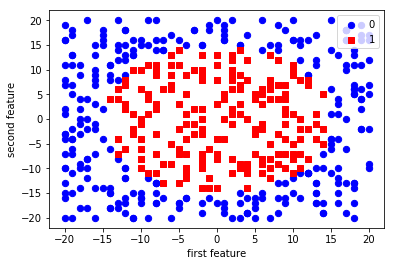

In [4]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=Y)
print("num of train samples = {}".format(len(X_train)))
print("num of test samples = {}".format(len(X_test)))

num of train samples = 375
num of test samples = 125


In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
classifier = LogisticRegression() # defining classifier

In [8]:
X_train.shape

(375, 2)

In [9]:
y_train.shape

(375,)

In [10]:
classifier.fit(X_train, y_train) # training classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
prediction = classifier.predict(X_test) # prediction or testing 
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
print(prediction)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 1 1 1 1 1 0 0 1 0 1 1]


In [13]:
np.shape(y_test)

(125,)

In [14]:
np.mean(prediction == y_test)

0.47999999999999998

In [15]:

classifier.score(X_test, y_test)

0.47999999999999998

In [16]:
classifier.score(X_train, y_train)

0.496

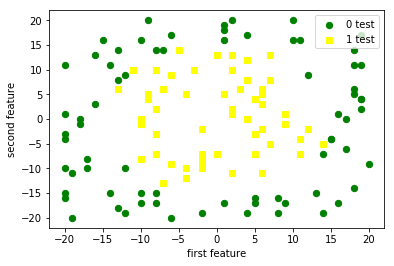

In [17]:

# plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
#             c='blue', s=40, label='0 train')
# plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
#             c='red', s=40, label='1 train ', marker='s')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
            c='green', s=40, label='0 test')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
            c='yellow', s=40, label='1 test', marker='s')
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.legend(loc='upper right');



**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [18]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.01696042  0.00485671]]
[-0.28446118]
